In [148]:
import pandas as pd
from glob import glob
from collections import Counter 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'


BAM_MAPPINGS_FILE = '/home/groups/dpwall/briannac/general_data/bam_mappings.csv'
CONC_FILE= '/home/groups/dpwall/briannac/blood_microbiome/data/decontam/concentrations.csv'
NYGC_FILE = '/home/groups/dpwall/briannac/blood_microbiome/intermediate_files/decontam/NYGC_DNA_stats'

ABUNDANCES_FILE = '/home/groups/dpwall/briannac/blood_microbiome/data/kraken_align/microbe_filtered_species.csv'

FOR_DECONTAM_FILE = BLOOD_MICROBIOME_DIR + 'intermediate_files/decontam/for_decontam_microbe.csv'
DECONTAM_FILE = BLOOD_MICROBIOME_DIR + 'results/decontam/contaminants_microbe_minimum.csv'


# Examine decontam results.

In [149]:
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)
bam_mappings = bam_mappings[bam_mappings['status']=='Passed_QC_analysis_ready']
for_decontam = pd.read_csv(FOR_DECONTAM_FILE, index_col=0)
for_decontam.columns = [''.join(c[np.where(np.array(list(c))!=' ')[0][0]:]).replace(' ', '.').replace('-','.') for c in for_decontam.columns]
decontam_results = pd.read_csv(DECONTAM_FILE, index_col=0)

In [144]:
decontam_results = pd.read_csv(DECONTAM_FILE, index_col=0)

In [158]:
sum(decontam_results.contaminant)

2

In [162]:
decontam_results.sort_values('p')

,freq,prev,p.freq,p.prev,p,contaminant
Lactococcus.virus.c2,1.071906e-11,24,0.031552,NaN,0.031552,True
Natronomonas.sp..C90,2.510452e-09,1063,0.059492,NaN,0.059492,True
Human.mastadenovirus.C,2.726389e-11,56,0.104804,NaN,0.104804,False
Bacillus.sp..V3,4.845253e-08,3033,0.143903,NaN,0.143903,False
Human.betaherpesvirus.6B,6.694065e-06,297,0.156824,NaN,0.156824,False
...,...,...,...,...,...,...
Torque.teno.virus.15,5.635341e-12,8,0.510121,NaN,0.510121,False
Primate.erythroparvovirus.3,4.080478e-12,8,0.513192,NaN,0.513192,False
Torque.teno.virus.21,1.238374e-11,5,0.516407,NaN,0.516407,False
Torque.teno.virus.20,1.010879e-11,5,0.518369,NaN,0.518369,False


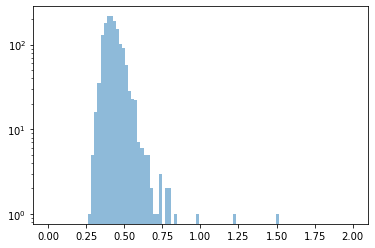

In [151]:
plt.hist(-np.log10(decontam_results.p.values), bins=np.linspace(0,2, 100), alpha=.5)
#plt.hist(np.log10(decontam_exact.p.values), bins=50, alpha=.5)
#plt.yscale('log')
plt.yscale('log')
plt.show()

In [152]:
np.median(decontam_results.p.values)

0.381357220848733

In [153]:
decontam_results.sort_values('p').head(30)

,freq,prev,p.freq,p.prev,p,contaminant
Lactococcus.virus.c2,1.071906e-11,24,0.031552,NaN,0.031552,True
Natronomonas.sp..C90,2.510452e-09,1063,0.059492,NaN,0.059492,True
Human.mastadenovirus.C,2.726389e-11,56,0.104804,NaN,0.104804,False
Bacillus.sp..V3,4.845253e-08,3033,0.143903,NaN,0.143903,False
Human.betaherpesvirus.6B,6.694065e-06,297,0.156824,NaN,0.156824,False
Alcaligenes.faecalis,7.831292e-07,3033,0.160120,NaN,0.160120,False
Caldicellulosiruptor.bescii,1.601069e-07,3033,0.164703,NaN,0.164703,False
Streptomyces.sp..CB00271,1.734574e-07,3033,0.166568,NaN,0.166568,False
Streptomyces.cacaoi,2.534354e-07,3033,0.181011,NaN,0.181011,False
Sulfurospirillum.multivorans,2.458694e-08,3028,0.181058,NaN,0.181058,False


/home/users/briannac/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:2036: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): rug.
  warnings.warn(msg, UserWarning)


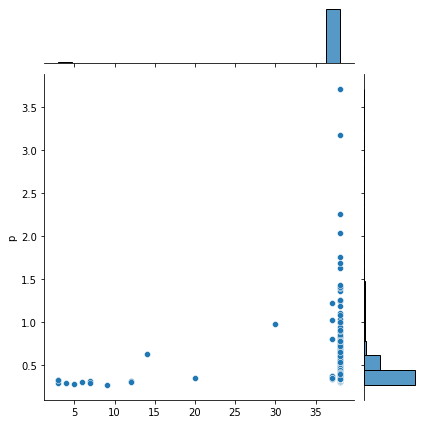

In [71]:
n_seq_plates= (for_decontam.groupby('sequencing_plate').max()>0).sum()[:-1]
sns.jointplot(x=n_seq_plates.values,
              y=-np.log10(decontam_results.p),
              marginal_kws=dict(bins=20, rug=True))

plt.show()


No handles with labels found to put in legend.


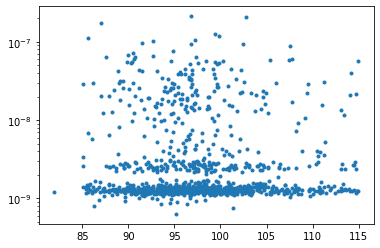

In [132]:
val = 'Natronomonas.sp..C90' #decontam_results.sort_values('p').index[1]
plt.plot(for_decontam['concentration'].values, for_decontam[val].values, '.')#, hue='sequencing_plate')
plt.legend().remove()
plt.yscale('log')
#plt.xscale('log')

In [ ]:
plt.plot(for_decontam[val].values)

In [438]:
abundances_exact.head(20).iloc[14].values[2:]

array([1352, 50, 133, ..., 103, 74, 50], dtype=object)

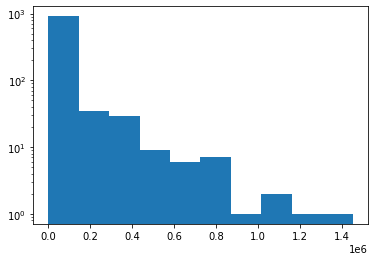

In [440]:
plt.hist((abundances_exact.head(20).iloc[14].values[2:]), bins=10)
plt.yscale('log')

In [16]:
sns.scatterplot(data=decontam_children.iloc[np.where(abundances_children.tax_level!='FFFF')], x='prev', y='p')
plt.yscale('log')
#plt.xscale('log')
plt.figure()
plt.hist(np.log10(decontam_children.iloc[np.where(abundances_children.tax_level!='FFF')].p), bins=50)
plt.yscale('log')
plt.show()



NameError: name 'abundances_children' is not defined

In [274]:
decontam_children.iloc[np.where(abundances_children.tax_level=='S')].p

Homo.sapiens                            0.336970
Staphylococcus.aureus                   0.415939
Pseudomonas.tolaasii                    0.260389
Plantactinospora.sp..BB1                0.074696
Candidatus.Portiera.aleyrodidarum       0.352116
                                          ...   
Hedyotis.yellow.mosaic.betasatellite         NaN
Salmonella.virus.BP12B                       NaN
Escherichia.virus.UAB78                      NaN
Asparagus.virus.2                            NaN
Salmonella.phage.64795_sal3                  NaN
Name: p, Length: 11837, dtype: float64

In [ ]:
decontam_exact

In [ ]:
decontam_exact[decontam_exact.contaminant]

In [106]:
for_decontam_exact.columns = [''.join(c[np.where(np.array(list(c))!=' ')[0][0]:]).replace(' ', '.') for c in for_decontam_exact.columns]

In [78]:
for_decontam_exact[decontam_exact[decontam_exact['contaminant']==True].index]

KeyError: "['Hubei.toti.like.virus.24', 'Alphacoronavirus.Bat.CoV.P.kuhlii.Italy.3398.19.2015', 'Shahe.picorna.like.virus.12', 'Feline.stool.associated.circular.virus.KU14', 'Papaya.leaf.crumple.virus.Panipat.8..India.Panipat.Papaya.2008.', 'Escherichia.phage.ECML.4', 'White.eye.coronavirus.HKU16', 'Gill.associated.virus', 'Salmonella.enterica.subsp..enterica.serovar.Typhimurium.var..5.', 'Escherichia.coli.str..K.12.substr..W3110', 'Porcine.bocavirus.1.pig.ZJD.China.2006', 'Grapevine.leafroll.associated.virus.7', 'Bulbul.coronavirus.HKU11.934'] not in index"

In [79]:
for_decontam_exact['Hubei.toti.like.virus.24']

KeyError: 'Hubei.toti.like.virus.24'